In [360]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from helpers.get_data_consumation import get_excel_data
import sys
import os


data_excel = get_excel_data("bureau_electricity")

In [361]:
df = data_excel.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 397 entries, Datetime to BATIMENT0000002207357911
dtypes: float64(396), object(1)
memory usage: 26.5+ MB


In [362]:
df.describe()

,BATIMENT0000000000449256,BATIMENT0000000000449819,BATIMENT0000000240289285,BATIMENT0000000240289639,BATIMENT0000000240290871,BATIMENT0000000240291408,BATIMENT0000000240291414,BATIMENT0000000240291486,BATIMENT0000000240292272,BATIMENT0000000240292273,BATIMENT0000000240292797,BATIMENT0000000240293002,BATIMENT0000000240293099,BATIMENT0000000240293144,BATIMENT0000000240294899,BATIMENT0000000240295438,BATIMENT0000000240295818,BATIMENT0000000240295945,BATIMENT0000000240296642,BATIMENT0000000240296739,BATIMENT0000000240297176,BATIMENT0000000240297436,BATIMENT0000000240299485,BATIMENT0000000240322795,BATIMENT0000000240326729,BATIMENT0000000240328049,BATIMENT0000000240329245,BATIMENT0000000240607776,BATIMENT0000000240608757,BATIMENT0000000240609821,BATIMENT0000000240613267,BATIMENT0000000240613547,BATIMENT0000000240617983,BATIMENT0000000240618310,BATIMENT0000000240618514,BATIMENT0000000240618520,BATIMENT0000000240634766,BATIMENT0000000240634976,BATIMENT0000000240635034,BATIMENT0000000240635305,BATIMENT0000000240637636,BATIMENT0000000240662816,BATIMENT0000000240777665,BATIMENT0000000240777956,BATIMENT0000000240781108,BATIMENT0000000240781540,BATIMENT0000000240782792,BATIMENT0000000240782987,BATIMENT0000000240783220,BATIMENT0000000241227933,BATIMENT0000000241237784,BATIMENT0000000241389205,BATIMENT0000000241389230,BATIMENT0000000241389833,BATIMENT0000000241389945,BATIMENT0000000241391819,BATIMENT0000000241393136,BATIMENT0000000241395443,BATIMENT0000000241396331,BATIMENT0000000241396386,BATIMENT0000000241396765,BATIMENT0000000241396781,BATIMENT0000000241396807,BATIMENT0000000241396951,BATIMENT0000000241397676,BATIMENT0000000241398298,BATIMENT0000000241398397,BATIMENT0000000241511444,BATIMENT0000000241511452,BATIMENT0000000241512230,BATIMENT0000000241512363,BATIMENT0000000241512889,BATIMENT0000000245954555,BATIMENT0000000318526776,BATIMENT0000000318568502,BATIMENT0000000334988548,BATIMENT0000000353682768,BATIMENT0000000353682852,BATIMENT0000000356598814,BATIMENT0000002011659862,BATIMENT0000002205929230,BATIMENT0000000240619195,BATIMENT0000000240619376,BATIMENT0000000241235919,BATIMENT0000000320455750,BATIMENT0000000322092776,BATIMENT0000000322227488,BATIMENT0000000322375593,BATIMENT0000000322401558,BATIMENT0000000322444327,BATIMENT0000000322444438,BATIMENT0000000322445407,BATIMENT0000000322446994,BATIMENT0000000322447877,BATIMENT0000000322449886,BATIMENT0000000322460995,BATIMENT0000000323412819,BATIMENT0000000323413822,BATIMENT0000000323414484,BATIMENT0000000323415136,BATIMENT0000000323420513,BATIMENT0000000323498172,BATIMENT0000000323498288,BATIMENT0000000323617851,BATIMENT0000000323617878,BATIMENT0000000323649978,BATIMENT0000000323683338,BATIMENT0000000323688765,BATIMENT0000000323708453,BATIMENT0000000323746945,BATIMENT0000000323764899,BATIMENT0000000323766796,BATIMENT0000000323813241,BATIMENT0000000323837073,BATIMENT0000000323858935,BATIMENT0000000323962742,BATIMENT0000000323963816,BATIMENT0000000323967743,BATIMENT0000000323992832,BATIMENT0000000323992839,BATIMENT0000000324057616,BATIMENT0000000324067215,BATIMENT0000000356481086,BATIMENT0000000356487582,BATIMENT0000000356488076,BATIMENT0000002012319329,BATIMENT0000002012374185,BATIMENT0000002012492392,BATIMENT0000002012578100,BATIMENT0000002012578187,BATIMENT0000002012753345,BATIMENT0000002100005940,BATIMENT0000002100142524,BATIMENT0000002100407895,BATIMENT0000002100408875,BATIMENT0000000002690025,BATIMENT0000000229476473,BATIMENT0000000229488998,BATIMENT0000000243398831,BATIMENT0000000243399170,BATIMENT0000000243399750,BATIMENT0000000243399988,BATIMENT0000000243400168,BATIMENT0000000243400820,BATIMENT0000000243403586,BATIMENT0000000243403690,BATIMENT0000000243404106,BATIMENT0000000243404125,BATIMENT0000000243727123,BATIMENT0000000243831467,BATIMENT0000000243833064,BATIMENT0000000244075415,BATIMENT0000000244075559,BATIMENT0000000244075733,BATIMENT0000000244078599,BATIMENT0000000244201474,BATIMENT0000000244403529,BATIMENT0000000244461141,BATIMENT0000000244462812,BATIMENT0000000245114937

In [363]:
df = df.filter(regex="^(?!Unnamed)")
df_unique = df.loc[:, ~df.columns.duplicated()]
# Extraire les noms de colonnes dans un tableau
df_datetime = df_unique.filter(like="Datetime")

columns_array = df_datetime.columns.to_list()

# Afficher le tableau des noms de colonnes
columns_to_drop = [col for col in df_datetime.columns if col != "Datetime"]
df_unique.drop(columns=columns_to_drop, inplace=True)

df = df_unique
# Convert the "Datetime" column to datetime format
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Convert the datetime values to a specific format ("%Y-%m-%d %H:%M")
df["Datetime"] = df["Datetime"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))

# Convert the formatted datetime values back to datetime format
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Set the "Datetime" column as the index of the DataFrame
df_to_show = df.set_index("Datetime")

df_to_show

,BATIMENT0000000000449256,BATIMENT0000000000449819,BATIMENT0000000240289285,BATIMENT0000000240289639,BATIMENT0000000240290871,BATIMENT0000000240291408,BATIMENT0000000240291414,BATIMENT0000000240291486,BATIMENT0000000240292272,BATIMENT0000000240292273,BATIMENT0000000240292797,BATIMENT0000000240293002,BATIMENT0000000240293099,BATIMENT0000000240293144,BATIMENT0000000240294899,BATIMENT0000000240295438,BATIMENT0000000240295818,BATIMENT0000000240295945,BATIMENT0000000240296642,BATIMENT0000000240296739,BATIMENT0000000240297176,BATIMENT0000000240297436,BATIMENT0000000240299485,BATIMENT0000000240322795,BATIMENT0000000240326729,BATIMENT0000000240328049,BATIMENT0000000240329245,BATIMENT0000000240607776,BATIMENT0000000240608757,BATIMENT0000000240609821,BATIMENT0000000240613267,BATIMENT0000000240613547,BATIMENT0000000240617983,BATIMENT0000000240618310,BATIMENT0000000240618514,BATIMENT0000000240618520,BATIMENT0000000240634766,BATIMENT0000000240634976,BATIMENT0000000240635034,BATIMENT0000000240635305,BATIMENT0000000240637636,BATIMENT0000000240662816,BATIMENT0000000240777665,BATIMENT0000000240777956,BATIMENT0000000240781108,BATIMENT0000000240781540,BATIMENT0000000240782792,BATIMENT0000000240782987,BATIMENT0000000240783220,BATIMENT0000000241227933,BATIMENT0000000241237784,BATIMENT0000000241389205,BATIMENT0000000241389230,BATIMENT0000000241389833,BATIMENT0000000241389945,BATIMENT0000000241391819,BATIMENT0000000241393136,BATIMENT0000000241395443,BATIMENT0000000241396331,BATIMENT0000000241396386,BATIMENT0000000241396765,BATIMENT0000000241396781,BATIMENT0000000241396807,BATIMENT0000000241396951,BATIMENT0000000241397676,BATIMENT0000000241398298,BATIMENT0000000241398397,BATIMENT0000000241511444,BATIMENT0000000241511452,BATIMENT0000000241512230,BATIMENT0000000241512363,BATIMENT0000000241512889,BATIMENT0000000245954555,BATIMENT0000000318526776,BATIMENT0000000318568502,BATIMENT0000000334988548,BATIMENT0000000353682768,BATIMENT0000000353682852,BATIMENT0000000356598814,BATIMENT0000002011659862,BATIMENT0000002205929230,BATIMENT0000000240619195,BATIMENT0000000240619376,BATIMENT0000000241235919,BATIMENT0000000320455750,BATIMENT0000000322092776,BATIMENT0000000322227488,BATIMENT0000000322375593,BATIMENT0000000322401558,BATIMENT0000000322444327,BATIMENT0000000322444438,BATIMENT0000000322445407,BATIMENT0000000322446994,BATIMENT0000000322447877,BATIMENT0000000322449886,BATIMENT0000000322460995,BATIMENT0000000323412819,BATIMENT0000000323413822,BATIMENT0000000323414484,BATIMENT0000000323415136,BATIMENT0000000323420513,BATIMENT0000000323498172,BATIMENT0000000323498288,BATIMENT0000000323617851,BATIMENT0000000323617878,BATIMENT0000000323649978,BATIMENT0000000323683338,BATIMENT0000000323688765,BATIMENT0000000323708453,BATIMENT0000000323746945,BATIMENT0000000323764899,BATIMENT0000000323766796,BATIMENT0000000323813241,BATIMENT0000000323837073,BATIMENT0000000323858935,BATIMENT0000000323962742,BATIMENT0000000323963816,BATIMENT0000000323967743,BATIMENT0000000323992832,BATIMENT0000000323992839,BATIMENT0000000324057616,BATIMENT0000000324067215,BATIMENT0000000356481086,BATIMENT0000000356487582,BATIMENT0000000356488076,BATIMENT0000002012319329,BATIMENT0000002012374185,BATIMENT0000002012492392,BATIMENT0000002012578100,BATIMENT0000002012578187,BATIMENT0000002012753345,BATIMENT0000002100005940,BATIMENT0000002100142524,BATIMENT0000002100407895,BATIMENT0000002100408875,BATIMENT0000000002690025,BATIMENT0000000229476473,BATIMENT0000000229488998,BATIMENT0000000243398831,BATIMENT0000000243399170,BATIMENT0000000243399750,BATIMENT0000000243399988,BATIMENT0000000243400168,BATIMENT0000000243400820,BATIMENT0000000243403586,BATIMENT0000000243403690,BATIMENT0000000243404106,BATIMENT0000000243404125,BATIMENT0000000243727123,BATIMENT0000000243831467,BATIMENT0000000243833064,BATIMENT0000000244075415,BATIMENT0000000244075559,BATIMENT0000000244075733,BATIMENT0000000244078599,BATIMENT0000000244201474,BATIMENT0000000244403529,BATIMENT0000000244461141,BATIMENT0000000244462812,BATIMENT0000000245114937

In [364]:
nan_count = df.isna().sum().sum()
print("Nombre total de NaN dans le DataFrame : {}".format(nan_count))

null_count = df.isnull().sum().sum()
print("Nombre total de null dans le DataFrame : {}".format(null_count))

Nombre total de NaN dans le DataFrame : 0
Nombre total de null dans le DataFrame : 0


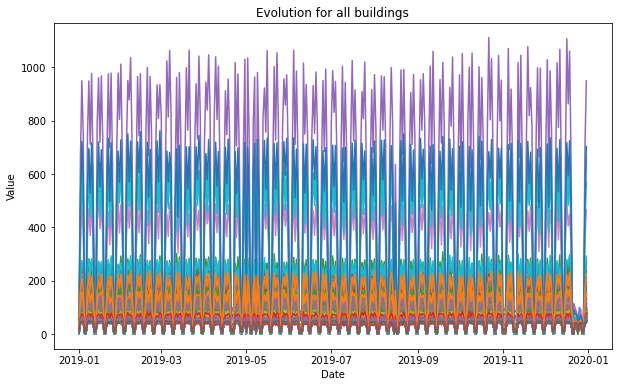

In [365]:
# Create a copy of df_to_show DataFrame to avoid modifying the original data
df_to_show_day = df_to_show.copy()
# Get the column names (building names) from the DataFrame
building_columns = df_to_show.columns
# Extract the date component from the index and add it as a new "date" column
df_to_show_day["date"] = df_to_show.index.date

# Group the DataFrame by date and calculate the sum of each column for each date
df_to_show_day = df_to_show_day.groupby(["date"]).sum()

# Reset the index to make "date" a regular column again
df_to_show_day = df_to_show_day.reset_index()

# Set the figure size to 10x6 inches
plt.figure(figsize=(10, 6))

# Iterate through each building column and plot the curve on the same graph
for building in building_columns:
    plt.plot(df_to_show_day.date, df_to_show_day[building], label=building)

# Add legends and axis labels
plt.title("Evolution for all buildings")
plt.xlabel("Date")
plt.ylabel("Value")

# Uncomment the line below if you want to display legends for each building
# plt.legend()

# Display the plot
plt.show()

In [366]:
# Create a copy of df_to_show_day DataFrame to avoid modifying the original data
result_df = df_to_show_day.copy()

# Convert the 'date' column to datetime format
result_df.date = pd.to_datetime(result_df.date)

# Insert a new column 'day' next to the 'date' column, representing the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
result_df.insert(
    result_df.columns.get_loc("date") + 1, "day", result_df["date"].dt.weekday
)

# Display the resulting DataFrame
print(result_df)

# Extract the column names starting from the third column (building IDs)
buildings_ids = result_df.columns[2:]

# Display the building IDs
print(buildings_ids)

          date  day  BATIMENT0000000000449256  BATIMENT0000000000449819  \
0   2019-01-01    1                 16.968223                 15.498491   
1   2019-01-02    2                 55.512197                 52.996642   
2   2019-01-03    3                 66.054601                 60.724806   
3   2019-01-04    4                 58.096961                 55.068820   
4   2019-01-05    5                 15.043904                 16.057528   
..         ...  ...                       ...                       ...   
360 2019-12-27    4                 38.750890                 37.552870   
361 2019-12-28    5                  9.496474                 13.530682   
362 2019-12-29    6                  8.738197                 15.353070   
363 2019-12-30    0                 50.307145                 52.654752   
364 2019-12-31    1                 60.251172                 60.296915   

     BATIMENT0000000240289285  BATIMENT0000000240289639  \
0                   38.664997           

In [367]:
# Create a DataFrame 'data_to_cluster' to store aggregated information for clustering
data_to_cluster = pd.DataFrame(
    index=buildings_ids,
)


# Calculate the percentage of electricity consumption for each building on Mondays and add to 'data_to_cluster'
data_to_cluster["Monday"] = (
    result_df[result_df["day"] == 0][buildings_ids].sum().values
)

# Repeat the process for each day of the week (Tuesday to Sunday)
data_to_cluster["Tuesday"] = (
    result_df[result_df["day"] == 1][buildings_ids].sum().values

)
data_to_cluster["Wednesday"] = (
    result_df[result_df["day"] == 2][buildings_ids].sum().values

)
data_to_cluster["Thursday"] = (
    result_df[result_df["day"] == 3][buildings_ids].sum().values

)
data_to_cluster["Friday"] = (
    result_df[result_df["day"] == 4][buildings_ids].sum().values

)
data_to_cluster["Saturday"] = (
    result_df[result_df["day"] == 5][buildings_ids].sum().values

)
data_to_cluster["Sunday"] = (
    result_df[result_df["day"] == 6][buildings_ids].sum().values
)

In [368]:
# Display the first few rows of 'data_to_cluster'
data_to_cluster.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526


           BATIMENT0000000000449256  BATIMENT0000000000449819  \
Monday                  2745.164665               2637.351379   
Tuesday                 3317.550386               3130.642186   
Wednesday               2837.298716               2694.933973   
Thursday                3214.670154               3069.500057   
Friday                  2866.090459               2713.407684   
Saturday                 732.624896                780.364788   
Sunday                   729.818248                783.311629   

           BATIMENT0000000240289285  BATIMENT0000000240289639  \
Monday                  9788.947804               2891.531604   
Tuesday                14062.767320               3400.563904   
Wednesday              10549.564201               2972.996880   
Thursday               13863.965026               3302.210520   
Friday                 10243.492885               2967.421782   
Saturday                1858.653824                608.870476   
Sunday                  

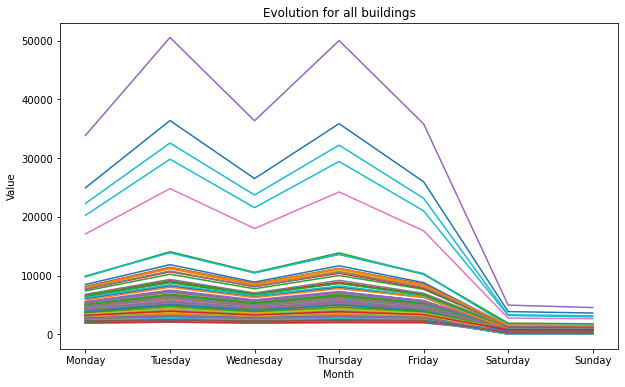

In [369]:
data_to_show = data_to_cluster.copy()
# data_to_show["nr"] = range(1, len(data_to_show) + 1)
# data_to_show.reset_index(inplace=True)

data_to_show = data_to_show.transpose()

print(data_to_show)
# Afficher le graphique
plt.show()
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Iterate through each building column and plot the curve on the same graph
for building in building_columns:
    # Plot the data for the current building
    plt.plot(data_to_show.index, data_to_show[building], label=building)

# Add title and axis labels to the plot
plt.title("Evolution for all buildings")
plt.xlabel("Month")
plt.ylabel("Value")

# Uncomment the line below to display legends for each building
# plt.legend()

# Display the plot
plt.show()

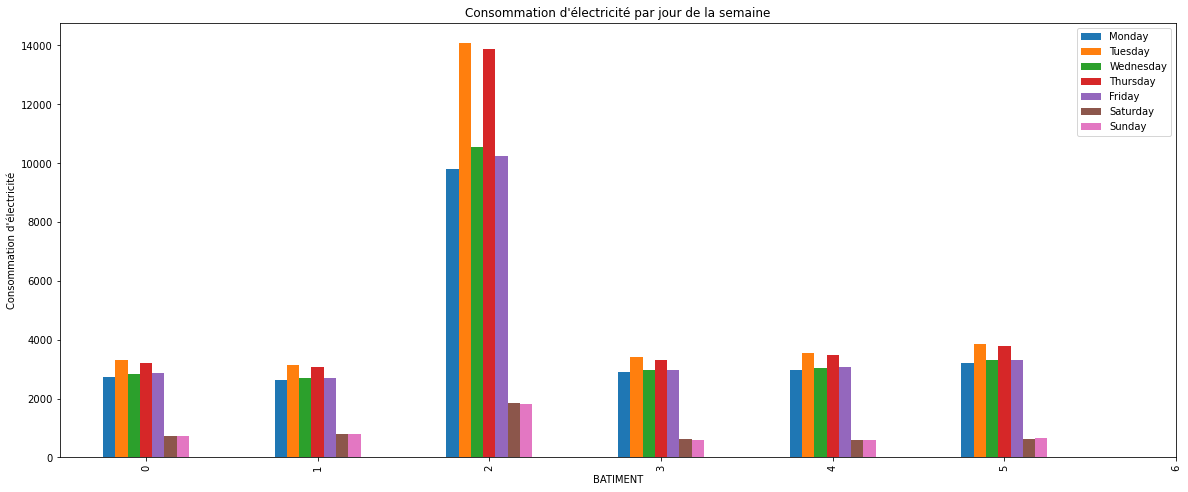

In [370]:
# Définir la colonne 'index' comme index du DataFrame
# df.set_index("index", inplace=True)
df = data_to_cluster.head(6).copy()
df.plot(kind="bar", figsize=(20, 8))
plt.title("Consommation d'électricité par jour de la semaine")
plt.xlabel("BATIMENT")
plt.ylabel("Consommation d'électricité")
# plt.legend(title="Jour de la semaine", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(range(len(df.columns)), range(len(df.columns)))

# Afficher le graphique
plt.show()

In [371]:
df_week_profil = data_to_cluster.copy()

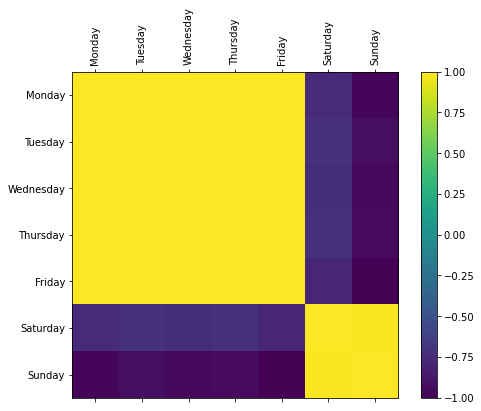

In [372]:
# Calculate the correlation matrix for the normalized data
corr = data_to_cluster.corr()

# Create a figure and axis for the correlation matrix plot
fig, ax = plt.subplots(figsize=(8, 6))

# Display the correlation matrix as a color-coded heatmap
cax = ax.matshow(corr, vmin=-1, vmax=1)
ax.matshow(corr)

# Set the tick locations and labels for both axes
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
ax.grid(False)

# Add a colorbar to the right of the plot
plt.colorbar(
    cax,
)

# Display the plot
plt.show()

In [373]:
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans

# Liste des paramètres à tester
n_clusters_list = [2, 3, 4]
n_init_list = [1, 5, 10]
# metrics_list = ["euclidean", "dtw", "softdtw"]
# metrics_list = ["euclidean", "dtw"]
metrics_list = ["euclidean"]
random_state_list = [0, 42, 100, 2022]

for n_clusters in n_clusters_list:
    for n_init in n_init_list:
        for metric in metrics_list:
            for random_state in random_state_list:
                # Création du modèle avec les paramètres actuels
                model_ts = TimeSeriesKMeans(
                    n_clusters=n_clusters,
                    n_init=n_init,
                    verbose=False,
                    metric=metric,
                    random_state=random_state,
                )

                # Entraînement du modèle
                model_ts.fit(data_to_cluster)

                # Calcul de la métrique (par exemple, le score silhouette)
                score = silhouette_score(
                    data_to_cluster, model_ts.labels_, metric=metric
                )

                # Affichage des résultats
                print(
                    f"Clusters: {n_clusters}, n_init: {n_init}, Metric: {metric}, Random State: {random_state}, Score: {score}, Inertia: {model_ts.inertia_}"
                )

Clusters: 2, n_init: 1, Metric: euclidean, Random State: 0, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 1, Metric: euclidean, Random State: 42, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 1, Metric: euclidean, Random State: 100, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 1, Metric: euclidean, Random State: 2022, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 5, Metric: euclidean, Random State: 0, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 5, Metric: euclidean, Random State: 42, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 5, Metric: euclidean, Random State: 100, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 5, Metric: euclidean, Random State: 2022, Score: 0.9368767394594563, Inertia: 15573379.308816858
Clusters: 2, n_init: 10, Metric: euclidean, Random State: 0, Score: 

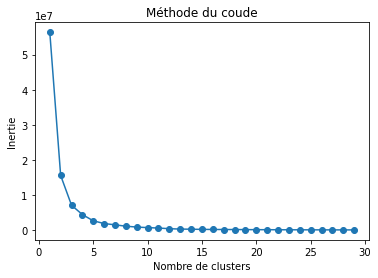

In [374]:
from matplotlib import pyplot as plt
from tslearn.clustering import TimeSeriesKMeans


def calcul_clusters_number_tslearn(X):
    inertia = []
    nb_maximal = 30

    for k in range(1, nb_maximal):
        km = TimeSeriesKMeans(
            n_clusters=k, metric="euclidean", max_iter=2, random_state=0
        )
        kmeans = km.fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, nb_maximal), inertia, marker="o")
    plt.title("Méthode du coude")
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Inertie")

    plt.show()


calcul_clusters_number_tslearn(data_to_cluster)

In [375]:
nb_clusters = 4
km_euclidean = TimeSeriesKMeans(
    n_clusters=nb_clusters, metric="euclidean", max_iter=50, random_state=0, n_init=2
)
model = km_euclidean.fit(data_to_cluster)
y_pred = km_euclidean.fit_predict(data_to_cluster)


dba_km = TimeSeriesKMeans(
    n_clusters=nb_clusters,
    n_init=2,
    metric="dtw",
    verbose=False,
    max_iter_barycenter=20,
    random_state=0,
)
model_dtw = dba_km.fit(data_to_cluster)
y_pred_dtw = dba_km.fit_predict(data_to_cluster)

sdtw_km = TimeSeriesKMeans(
    n_clusters=nb_clusters,
    metric="softdtw",
    metric_params={"gamma": 0.03},
    verbose=False,
    random_state=0,
)
model_sdtw = sdtw_km.fit(data_to_cluster)
y_pred_sdtw = sdtw_km.fit_predict(data_to_cluster)

In [376]:
df_week_profil.reset_index(inplace=True)
df_week_profil

,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
1,BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
2,BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
3,BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
4,BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526
...,...,...,...,...,...,...,...,...
391,BATIMENT0000002011407250,7981.224931,11335.806383,8559.233809,11203.339322,8429.419751,1563.360166,1462.988825
392,BATIMENT0000002011489430,2673.195080,3056.910174,2726.970627,3017.288990,2818.244489,181.396676,143.959214
393,BATIMENT0000002011526392,3233.548356,3933.921064,3298.970725,3842.301372,3362.228408,762.047808,757.743503
394,BATIMENT0000002207357872,2702.782600,3162.716818,2746.714674,3114.091921,2856.563240,398.534257,383.847184


In [377]:
week_days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

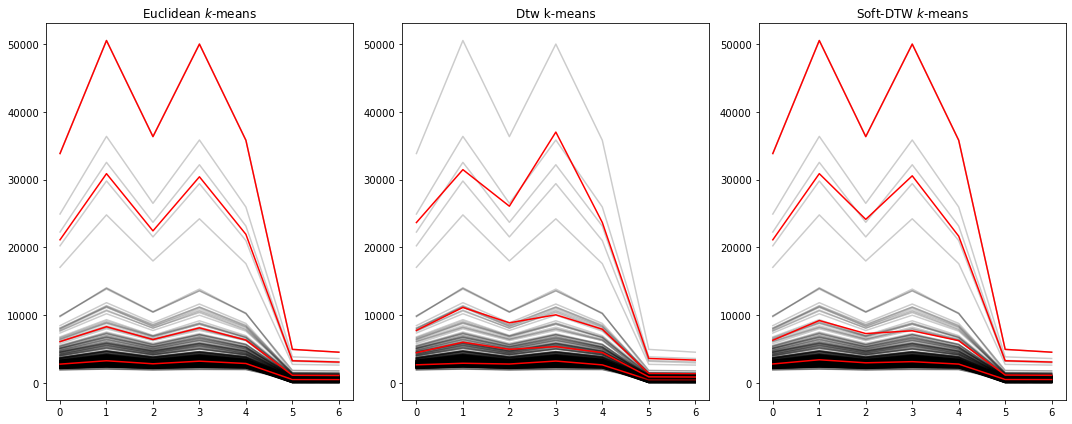

In [378]:
import matplotlib.pyplot as plt


def show_tslearn_clusters(df, y_pred_list, km_list, title_list, nb_clusters):
    plt.figure(figsize=(15, 6))

    for i, (y_pred, km, title) in enumerate(zip(y_pred_list, km_list, title_list)):
        plt.subplot(1, 3, i + 1)
        for yi in range(nb_clusters):
            plt.plot(df.iloc[y_pred == yi].values.T, "k-", alpha=0.2)
            plt.plot(km.cluster_centers_[yi], "r-")
            if yi == 0:
                plt.title(title)

    plt.tight_layout()
    plt.show()


# Utilisation
show_tslearn_clusters(
    data_to_cluster[week_days],
    [y_pred, y_pred_dtw, y_pred_sdtw],
    [km_euclidean, dba_km, sdtw_km],
    ["Euclidean $k$-means", "Dtw k-means", "Soft-DTW $k$-means"],
    nb_clusters,
)

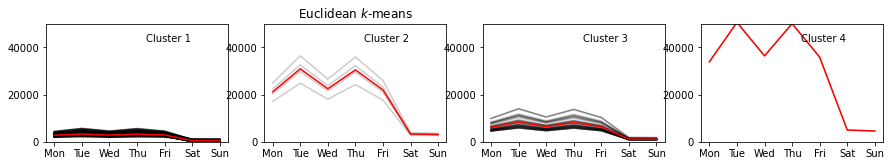

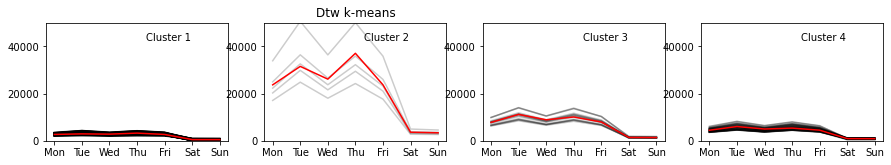

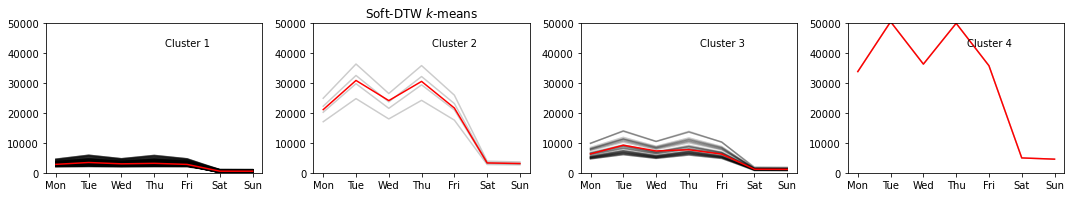

In [379]:
def show_tslearn_clusters(df_profil_day, y_pred, title, km, nb_clusters):
    plt.figure(figsize=(15, 10))
    # fig, axs = plt.subplots(nb_clusters, 1, figsize=(10, 6 * nb_clusters))
    column_labels = [col[:3] for col in df_profil_day.columns]
    for yi in range(nb_clusters):
        plt.subplot(nb_clusters, nb_clusters, yi + 1)
        for index, xx in df_profil_day.iterrows():
            if y_pred[index] == yi:
                plt.plot(xx, "k-", alpha=0.2)
        plt.plot(km.cluster_centers_[yi], "r-")
        plt.xticks(range(len(column_labels)), column_labels)

        plt.ylim(-1, 50000)
        plt.text(0.55, 0.85, "Cluster %d" % (yi + 1), transform=plt.gca().transAxes)
        if yi == 1:
            plt.title(title)


show_tslearn_clusters(
    df_week_profil[week_days],
    y_pred,
    "Euclidean $k$-means",
    km_euclidean,
    nb_clusters,
)


show_tslearn_clusters(
    df_week_profil[week_days], y_pred_dtw, "Dtw k-means", dba_km, nb_clusters
)

show_tslearn_clusters(
    df_week_profil[week_days], y_pred_sdtw, "Soft-DTW $k$-means", sdtw_km, nb_clusters
)
plt.tight_layout()
plt.show()

In [380]:
df_week_profil

,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
1,BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
2,BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
3,BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
4,BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526
...,...,...,...,...,...,...,...,...
391,BATIMENT0000002011407250,7981.224931,11335.806383,8559.233809,11203.339322,8429.419751,1563.360166,1462.988825
392,BATIMENT0000002011489430,2673.195080,3056.910174,2726.970627,3017.288990,2818.244489,181.396676,143.959214
393,BATIMENT0000002011526392,3233.548356,3933.921064,3298.970725,3842.301372,3362.228408,762.047808,757.743503
394,BATIMENT0000002207357872,2702.782600,3162.716818,2746.714674,3114.091921,2856.563240,398.534257,383.847184


In [381]:
inertia_scores = {}

inertia_scores["euclidean"] = model.inertia_
inertia_scores["dtw"] = model_dtw.inertia_
inertia_scores["sdtw"] = model_sdtw.inertia_

best_metric_inertia = min(inertia_scores, key=inertia_scores.get)


print("Inertia euclidean metric : ", inertia_scores["euclidean"])
print("Inertia dtw metric : ", inertia_scores["dtw"])
print("Inertia sdtw metric : ", inertia_scores["sdtw"])
print(f"Inertie preferable : {best_metric_inertia}")

Inertia euclidean metric :  4439521.956284885
Inertia dtw metric :  4600830.825043915
Inertia sdtw metric :  155054617533107.9
Inertie preferable : euclidean


In [382]:
df_week_profil_cluster = df_week_profil.copy()


if best_metric_inertia == "euclidean":
    df_week_profil_cluster.insert(0, "clusters", y_pred)
    model_optimal = model
    y_predict = y_pred
elif best_metric_inertia == "dtw":
    df_week_profil_cluster.insert(0, "clusters", y_pred_dtw)
    model_optimal = model_dtw
    y_predict = y_pred_dtw
elif best_metric_inertia == "sdtw":
    df_week_profil_cluster.insert(0, "clusters", y_pred_sdtw)
    model_optimal = model_sdtw
    y_predict = y_pred_sdtw


print("Silhouette score pour la meilleur metrique choisi en fonction de la meilleur inertie: ",silhouette_score(data_to_cluster, y_predict))
df_week_profil_cluster

Silhouette score pour la meilleur metrique choisi en fonction de la meilleur inertie:  0.7656467265574637


,clusters,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
1,0,BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
2,2,BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
3,0,BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
4,0,BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526
...,...,...,...,...,...,...,...,...,...
391,2,BATIMENT0000002011407250,7981.224931,11335.806383,8559.233809,11203.339322,8429.419751,1563.360166,1462.988825
392,0,BATIMENT0000002011489430,2673.195080,3056.910174,2726.970627,3017.288990,2818.244489,181.396676,143.959214
393,0,BATIMENT0000002011526392,3233.548356,3933.921064,3298.970725,3842.301372,3362.228408,762.047808,757.743503
394,0,BATIMENT0000002207357872,2702.782600,3162.716818,2746.714674,3114.091921,2856.563240,398.534257,383.847184


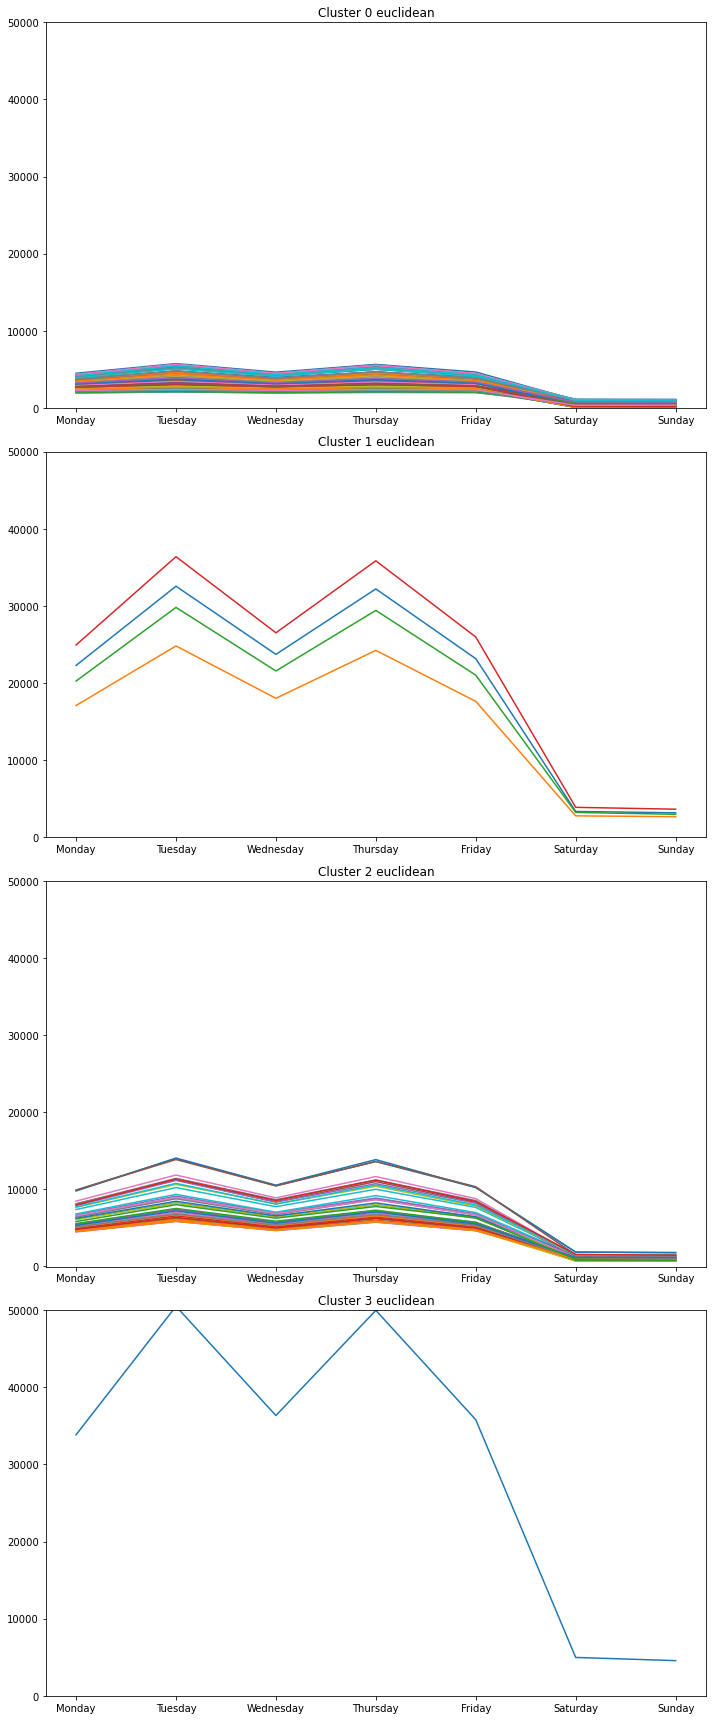

In [383]:
def show_clusters_comparison(df_profil_day, y_pred_list, title_list, nb_clusters):
    fig, axs = plt.subplots(nb_clusters, 1, figsize=(10, 6 * nb_clusters))

    for i in range(nb_clusters):
        for j, y_pred in enumerate(y_pred_list):
            ax = axs[i]
            for ind, el in enumerate(y_pred):
                if el == i:
                    ax.plot(df_profil_day.iloc[ind])
            # ax.set_xlim(-1, 50000)
            ax.set_ylim(-2, 50000)
            ax.set_title(f"Cluster {i} {title_list[j]}")

    plt.tight_layout()
    plt.show()


show_clusters_comparison(
    df_week_profil[week_days],
    [y_predict],
    [best_metric_inertia],
    nb_clusters,
)

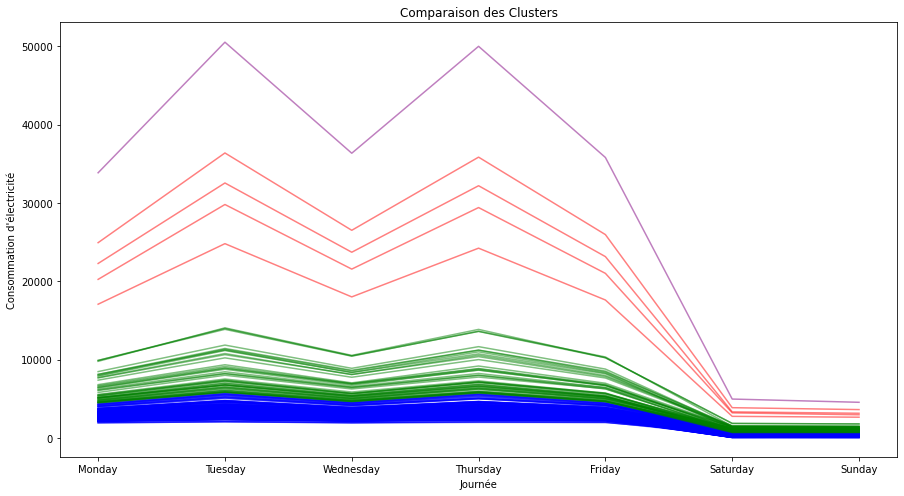

In [384]:
def show_clusters_comparison(df_profil_day, y_pred_list, title_list, nb_clusters):
    # Utilisation d'une palette de couleurs prédéfinie
    palette = [
        "blue",
        "red",
        "green",
        "purple",
        "orange",
        "cyan",
        "magenta",
        "yellow",
        "brown",
        "pink",
    ]

    plt.figure(figsize=(15, 8))

    for j, y_pred in enumerate(y_pred_list):
        for i in range(nb_clusters):
            cluster_mask = y_pred == i
            cluster_profiles = df_profil_day[cluster_mask]

            # Plotting chaque profile dans le cluster avec une couleur différente
            for _, profile in cluster_profiles.iterrows():
                plt.plot(
                    profile,
                    label=f"Cluster {i} - {title_list[j]}",
                    color=palette[i],
                    alpha=0.5,
                )

    plt.title("Comparaison des Clusters")
    plt.xlabel("Journée")
    plt.ylabel("Consommation d'électricité")

    plt.show()


# Utilisation
show_clusters_comparison(
    df_week_profil[week_days],
    [y_predict],
    [best_metric_inertia],
    nb_clusters,
)

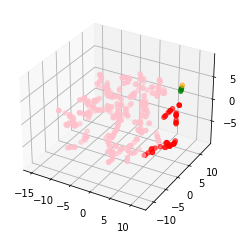

In [385]:
from sklearn.manifold import TSNE
import matplotlib.colors
import matplotlib.pyplot as plt


def plot_tsne_scatter_3d(df_with_clusters, y_pred):
    color_list = ["pink", "green", "red", "orange"]

    # Initialize t-SNE and fit_transform the data
    tsne = TSNE(
        n_components=3,  # Update to 3 dimensions
        init="pca",
        random_state=20,
        perplexity=5,
        n_iter=300,
    )
    results_tsne = tsne.fit_transform(df_with_clusters)

    # Create a colormap using cluster_values and color_list
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "custom_cmap", color_list
    )

    # Create a 3D scatter plot with t-SNE results
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    scatter = ax.scatter(
        results_tsne[:, 0],
        results_tsne[:, 1],
        results_tsne[:, 2],  # Add the third dimension
        c=y_pred,
        cmap=cmap,
        alpha=0.6,
    )

    # Show the plot
    plt.show()


# Example usage for df_profil_day


plot_tsne_scatter_3d(df_week_profil[week_days], y_predict)

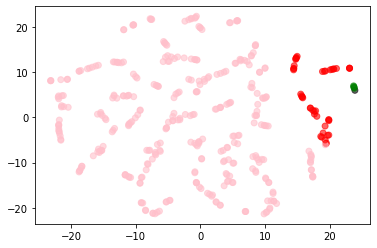

In [386]:
from sklearn.manifold import TSNE
import matplotlib.colors
import matplotlib.pyplot as plt


def plot_tsne_scatter(df_with_clusters, y_pred):
    color_list = ["pink", "green", "red", "black"]

    # Initialize t-SNE and fit_transform the data
    tsne = TSNE(
        n_components=2, 
        init="pca",
        random_state=0,
        perplexity=5,
        n_iter=300,
    )
    results_tsne = tsne.fit_transform(df_with_clusters)

    # Create a colormap using cluster_values and color_list
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "custom_cmap", color_list
    )

    # Scatter plot with t-SNE results
    plt.scatter(
        results_tsne[:, 0],
        results_tsne[:, 1],
        c=y_pred,
        cmap=cmap,
        alpha=0.6,
    )

    # Show the plot
    plt.show()


plot_tsne_scatter(df_week_profil[week_days], y_predict)

In [387]:
df_week_profil_cluster

,clusters,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
1,0,BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
2,2,BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
3,0,BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
4,0,BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526
...,...,...,...,...,...,...,...,...,...
391,2,BATIMENT0000002011407250,7981.224931,11335.806383,8559.233809,11203.339322,8429.419751,1563.360166,1462.988825
392,0,BATIMENT0000002011489430,2673.195080,3056.910174,2726.970627,3017.288990,2818.244489,181.396676,143.959214
393,0,BATIMENT0000002011526392,3233.548356,3933.921064,3298.970725,3842.301372,3362.228408,762.047808,757.743503
394,0,BATIMENT0000002207357872,2702.782600,3162.716818,2746.714674,3114.091921,2856.563240,398.534257,383.847184


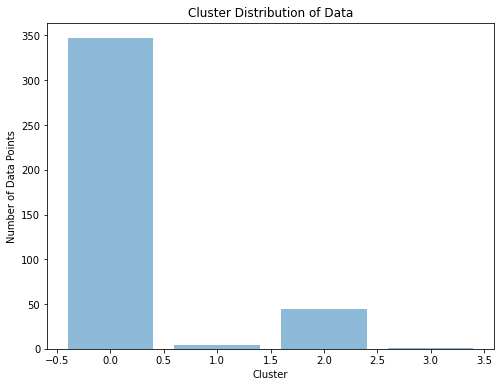

In [388]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to create a bar plot for cluster distribution
def plot_cluster_distribution(df, cluster_column, title):
    # Create a DataFrame with the counts of data points in each cluster
    cluster_counts = df[cluster_column].value_counts().sort_index()

    # Create a bar plot to visualize the distribution of data points across clusters
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.bar(cluster_counts.index, cluster_counts, align="center", alpha=0.5)

    # Set axis labels and plot title
    plt.xlabel("Cluster")
    plt.ylabel("Number of Data Points")
    plt.title(title)

    # Display the plot
    plt.show()


# Plot the cluster distribution for Euclidean metric
plot_cluster_distribution(
    df_week_profil_cluster, "clusters", "Cluster Distribution of Data"
)

In [389]:
df_week_profil_cluster

,clusters,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
1,0,BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
2,2,BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
3,0,BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
4,0,BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526
...,...,...,...,...,...,...,...,...,...
391,2,BATIMENT0000002011407250,7981.224931,11335.806383,8559.233809,11203.339322,8429.419751,1563.360166,1462.988825
392,0,BATIMENT0000002011489430,2673.195080,3056.910174,2726.970627,3017.288990,2818.244489,181.396676,143.959214
393,0,BATIMENT0000002011526392,3233.548356,3933.921064,3298.970725,3842.301372,3362.228408,762.047808,757.743503
394,0,BATIMENT0000002207357872,2702.782600,3162.716818,2746.714674,3114.091921,2856.563240,398.534257,383.847184


In [390]:
grouped_clusters = df_week_profil_cluster.groupby("clusters")
dfs_cluster = {cluster: group for cluster, group in grouped_clusters}

id_clusters = {}
for cluster, df_cluster in dfs_cluster.items():
    id_clust = df_cluster["index"].tolist()
    print(f"Nombre de bâtiments {cluster}: {len(id_clust)}")
    print(f"Index of DataFrame for Cluster {cluster}: {id_clust}")
    id_clusters[cluster] = id_clust

Nombre de bâtiments 0: 347
Index of DataFrame for Cluster 0: ['BATIMENT0000000000449256', 'BATIMENT0000000000449819', 'BATIMENT0000000240289639', 'BATIMENT0000000240290871', 'BATIMENT0000000240291408', 'BATIMENT0000000240291486', 'BATIMENT0000000240293002', 'BATIMENT0000000240293099', 'BATIMENT0000000240293144', 'BATIMENT0000000240294899', 'BATIMENT0000000240295438', 'BATIMENT0000000240295818', 'BATIMENT0000000240295945', 'BATIMENT0000000240296642', 'BATIMENT0000000240296739', 'BATIMENT0000000240297176', 'BATIMENT0000000240297436', 'BATIMENT0000000240299485', 'BATIMENT0000000240322795', 'BATIMENT0000000240326729', 'BATIMENT0000000240328049', 'BATIMENT0000000240329245', 'BATIMENT0000000240607776', 'BATIMENT0000000240608757', 'BATIMENT0000000240609821', 'BATIMENT0000000240613267', 'BATIMENT0000000240613547', 'BATIMENT0000000240617983', 'BATIMENT0000000240618310', 'BATIMENT0000000240618514', 'BATIMENT0000000240618520', 'BATIMENT0000000240634766', 'BATIMENT0000000240634976', 'BATIMENT00000

In [391]:
# Affichez le nombre d'éléments dans chaque cluster
cluster_counts = grouped_clusters.size()
print(cluster_counts)

clusters
0    347
1      4
2     44
3      1
dtype: int64


In [392]:
df_week_profil_cluster

,clusters,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,BATIMENT0000000000449256,2745.164665,3317.550386,2837.298716,3214.670154,2866.090459,732.624896,729.818248
1,0,BATIMENT0000000000449819,2637.351379,3130.642186,2694.933973,3069.500057,2713.407684,780.364788,783.311629
2,2,BATIMENT0000000240289285,9788.947804,14062.767320,10549.564201,13863.965026,10243.492885,1858.653824,1802.118735
3,0,BATIMENT0000000240289639,2891.531604,3400.563904,2972.996880,3302.210520,2967.421782,608.870476,588.556295
4,0,BATIMENT0000000240290871,2969.454481,3549.454224,3037.276966,3480.455181,3057.576025,591.119080,601.186526
...,...,...,...,...,...,...,...,...,...
391,2,BATIMENT0000002011407250,7981.224931,11335.806383,8559.233809,11203.339322,8429.419751,1563.360166,1462.988825
392,0,BATIMENT0000002011489430,2673.195080,3056.910174,2726.970627,3017.288990,2818.244489,181.396676,143.959214
393,0,BATIMENT0000002011526392,3233.548356,3933.921064,3298.970725,3842.301372,3362.228408,762.047808,757.743503
394,0,BATIMENT0000002207357872,2702.782600,3162.716818,2746.714674,3114.091921,2856.563240,398.534257,383.847184


In [393]:
from IPython.display import display

pd.set_option("display.max_columns", None)

# Afficher le DataFrame avec toutes les colonnes
mean_values = (
    df_week_profil_cluster[df_week_profil_cluster.columns]
    .groupby(["clusters"])
    .agg([np.mean])
)
display(mean_values)
# Réinitialiser l'option pour éviter d'autres problèmes d'affichage
pd.reset_option("display.max_columns")

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,
0,2801.071896,3297.803572,2848.943250,3236.695914,2892.474700,533.762658,529.652572
1,21134.396093,30886.766741,22449.540855,30424.356504,21938.226099,3297.134671,3104.814899
2,6118.769816,8321.283163,6422.051785,8151.430072,6347.468759,1160.886080,1126.862240
3,33854.149677,50521.648846,36349.864490,49994.258638,35807.386858,4973.729322,4560.026112


In [394]:
mean_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Monday, mean)     4 non-null      float64
 1   (Tuesday, mean)    4 non-null      float64
 2   (Wednesday, mean)  4 non-null      float64
 3   (Thursday, mean)   4 non-null      float64
 4   (Friday, mean)     4 non-null      float64
 5   (Saturday, mean)   4 non-null      float64
 6   (Sunday, mean)     4 non-null      float64
dtypes: float64(7)
memory usage: 256.0 bytes


In [395]:
mean_to_work = mean_values.copy()
mean_to_work.columns = mean_to_work.columns.droplevel(level=1)
mean_to_work

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
clusters,,,,,,,
0,2801.071896,3297.803572,2848.943250,3236.695914,2892.474700,533.762658,529.652572
1,21134.396093,30886.766741,22449.540855,30424.356504,21938.226099,3297.134671,3104.814899
2,6118.769816,8321.283163,6422.051785,8151.430072,6347.468759,1160.886080,1126.862240
3,33854.149677,50521.648846,36349.864490,49994.258638,35807.386858,4973.729322,4560.026112


In [396]:
# Calculer la moyenne des cinq premières colonnes
mean_to_work["Mean_Workdays"] = mean_to_work.iloc[:, :5].mean(axis=1)

# Calculer la moyenne des deux dernières colonnes
mean_to_work["Mean_Weekend"] = mean_to_work.iloc[:, 5:7].mean(axis=1)

# Créer un nouveau DataFrame avec les deux colonnes moyennes
result_df = mean_to_work[["Mean_Workdays", "Mean_Weekend"]]

# Affichage du résultat
print(
    "\nNouveau DataFrame avec les moyennes des jours ouvrés et du week-end par cluster:"
)
print(result_df)


Nouveau DataFrame avec les moyennes des jours ouvrés et du week-end par cluster:
          Mean_Workdays  Mean_Weekend
clusters                             
0           3015.397866    531.707615
1          25366.657258   3200.974785
2           7072.200719   1143.874160
3          41305.461702   4766.877717


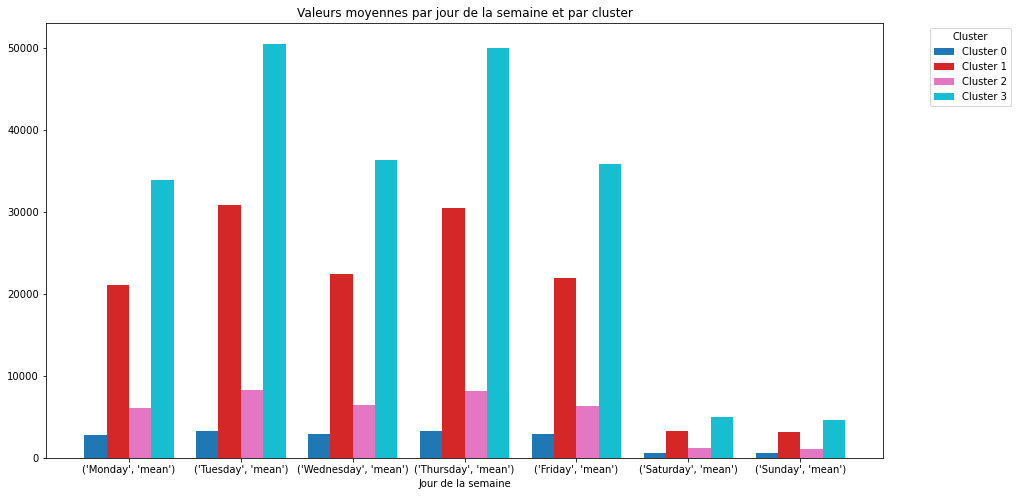

In [397]:
# Définir la palette de couleurs pour les clusters
palette = plt.cm.get_cmap("tab10", len(mean_values.index))

# Créer un graphique en barres groupées
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.2  # Largeur des barres

for i, cluster in enumerate(mean_values.index):
    x_positions = np.arange(len(mean_values.columns)) + i * bar_width
    ax.bar(
        x_positions,
        mean_values.loc[cluster],
        bar_width,
        label=f"Cluster {cluster}",
        color=palette(i),
    )

# Personnaliser l'axe x
ax.set_xticks(
    np.arange(len(mean_values.columns)) + bar_width * (len(mean_values.index) - 1) / 2
)
ax.set_xticklabels(mean_values.columns)
ax.set_xlabel("Jour de la semaine")

# Ajouter une légende
ax.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajouter un titre et afficher le graphique
plt.title("Valeurs moyennes par jour de la semaine et par cluster")
plt.show()

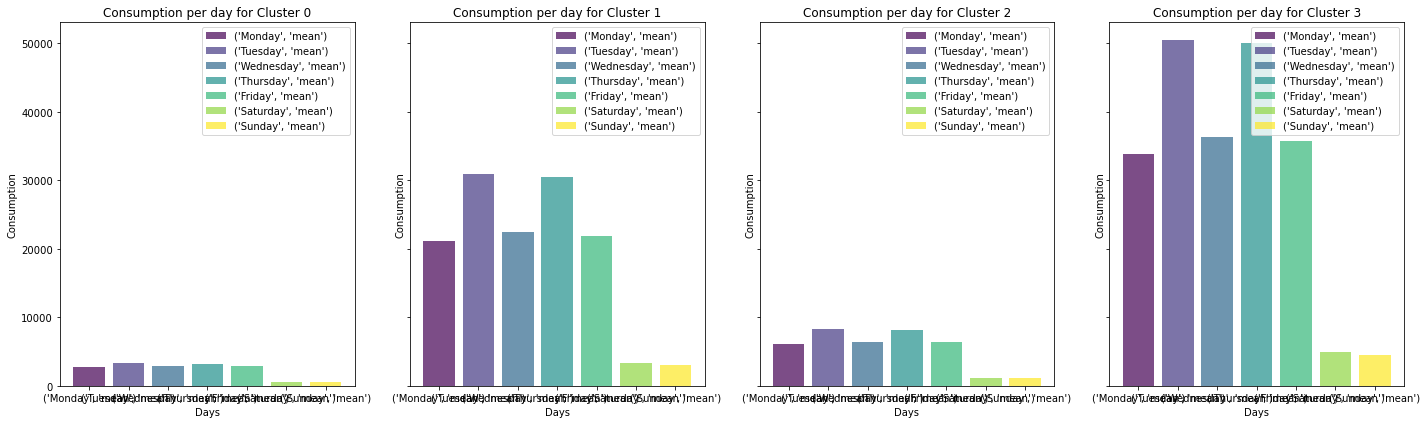

In [398]:
# Using a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(mean_values.columns)))

# Creating a figure with subplots for each cluster
fig, axs = plt.subplots(
    nrows=1, ncols=len(mean_values.index), figsize=(20, 6), sharey=True
)

# Iterating over each cluster
for i, cluster in enumerate(mean_values.index):
    # Creating a bar for each day with a different color
    for j, day in enumerate(mean_values.columns):
        axs[i].bar(
            j, mean_values.loc[cluster, day], color=colors[j], label=f"{day}", alpha=0.7
        )

    axs[i].set_title(f"Consumption per day for Cluster {cluster}")
    axs[i].set_xticks(np.arange(len(mean_values.columns)))
    axs[i].set_xticklabels([f"{day}" for day in mean_values.columns])
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Consumption")
    axs[i].legend()

plt.tight_layout()
plt.show()

In [399]:
from helpers.get_data_consumation import get_excel_file_data


def get_data_buildings():
    buildings = get_excel_file_data("BU_all_buildings_IDF.xlsx")

    return buildings



buildings_data = get_data_buildings()

print(buildings_data.head())

                         ID  bou  caf  chauf  ecr  mfd  pcf2e  port1e  \
0  BATIMENT0000000000449256   20   18      0   15    8     11      67   
1  BATIMENT0000000000449819  120  134      0  404   82    275     251   
2  BATIMENT0000000240289285  147  164      0  494  101    337     307   
3  BATIMENT0000000240289639   11   13      0   38    8     26      24   
4  BATIMENT0000000240290871   20   18      0   16    8     11      68   

   nb_equip  nb_equip_bureau  ...  Pmax_cl_par_m2  annuel_el_par_m2  \
0       139              101  ...       48.964595         16.444503   
1      1266             1012  ...       53.930219         15.809512   
2      1550             1239  ...       61.992223         62.169510   
3       120               96  ...       44.438954         16.732151   
4       141              103  ...       54.231608         17.286522   

   Pmax_el_par_m2  annee_construction  effectif  nb_equip_par_m2  \
0        5.469096              1986.0      74.0         0.077554  

In [400]:
building_id = "BATIMENT0000000241389833"

# Soustraire la ligne avec l'ID spécifié
row_to_subtract = buildings_data.index[buildings_data["ID"] == building_id]
print("row_to_subtract", row_to_subtract)

# Soustraire la ligne de 'row_to_subtract' du DataFrame original 'df'
df_subtracted = buildings_data.loc[row_to_subtract]

# Afficher le DataFrame après la suppression
df_subtracted

row_to_subtract Int64Index([53], dtype='int64')


,ID,bou,caf,chauf,ecr,mfd,pcf2e,port1e,nb_equip,nb_equip_bureau,...,Pmax_cl_par_m2,annuel_el_par_m2,Pmax_el_par_m2,annee_construction,effectif,nb_equip_par_m2,nb_equip_bureau_par_m2,nb_equip_autre_par_m2,bd_surface_par_occ,hbs_surface_par_occ
53,BATIMENT0000000241389833,1212,1107,0,953,492,656,4079,8499,6180,...,64.187003,33.841925,11.386954,2003.0,4515.0,0.342666,0.249168,0.093498,5.493374,5.631672


In [401]:
# Filtrer le DataFrame en fonction de la liste d'id
resultat = buildings_data[buildings_data["ID"].isin(id_clusters[0])]

# Afficher le résultat
print(resultat.loc[:, :])

                           ID  bou  caf  chauf  ecr  mfd  pcf2e  port1e  \
0    BATIMENT0000000000449256   20   18      0   15    8     11      67   
1    BATIMENT0000000000449819  120  134      0  404   82    275     251   
3    BATIMENT0000000240289639   11   13      0   38    8     26      24   
4    BATIMENT0000000240290871   20   18      0   16    8     11      68   
5    BATIMENT0000000240291408   20   18      0   15    8     10      67   
..                        ...  ...  ...    ...  ...  ...    ...     ...   
390  BATIMENT0000002011380424   20   22      0   66   13     45      41   
392  BATIMENT0000002011489430    9   10      0   31    6     21      19   
393  BATIMENT0000002011526392   32   36      0  108   22     74      67   
394  BATIMENT0000002207357872    9   10      0   29    6     20      18   
395  BATIMENT0000002207357911   11   12      0   37    8     26      23   

     nb_equip  nb_equip_bureau  ...  Pmax_cl_par_m2  annuel_el_par_m2  \
0         139             

In [402]:
# Filtrer le DataFrame en fonction de la liste d'id
resultat = buildings_data[buildings_data["ID"].isin(id_clusters[1])]

# Afficher le résultat
print(resultat)

                           ID  bou  caf  chauf   ecr  mfd  pcf2e  port1e  \
199  BATIMENT0000000244419248  219  211      0   307  103    210     667   
286  BATIMENT0000000338209717  305  340      0  1025  209    700     637   
349  BATIMENT0000000246537357  481  496      0  1092  273    746    1266   
350  BATIMENT0000000246544289  392  422      0  1092  251    747     922   

     nb_equip  nb_equip_bureau  ...  Pmax_cl_par_m2  annuel_el_par_m2  \
199      1717             1287  ...       90.323435        140.398972   
286      3216             2571  ...       90.089945        107.170087   
349      4354             3377  ...       97.034863        128.227008   
350      3826             3012  ...      100.037116        157.144877   

     Pmax_el_par_m2  annee_construction  effectif  nb_equip_par_m2  \
199       54.766245              2000.0     811.0         2.124393   
286       43.595071              2009.0    1157.0         1.959718   
349       49.330987              1991.0    

In [403]:
# Filtrer le DataFrame en fonction de la liste d'id
resultat = buildings_data[buildings_data["ID"].isin(id_clusters[2])]

pd.set_option("display.max_columns", None)

# Filtrer le DataFrame en fonction de la liste d'ID
resultat = buildings_data[buildings_data["ID"].isin(id_clusters[0])]

# Afficher le résultat
print(resultat)

                           ID  bou  caf  chauf  ecr  mfd  pcf2e  port1e  \
0    BATIMENT0000000000449256   20   18      0   15    8     11      67   
1    BATIMENT0000000000449819  120  134      0  404   82    275     251   
3    BATIMENT0000000240289639   11   13      0   38    8     26      24   
4    BATIMENT0000000240290871   20   18      0   16    8     11      68   
5    BATIMENT0000000240291408   20   18      0   15    8     10      67   
..                        ...  ...  ...    ...  ...  ...    ...     ...   
390  BATIMENT0000002011380424   20   22      0   66   13     45      41   
392  BATIMENT0000002011489430    9   10      0   31    6     21      19   
393  BATIMENT0000002011526392   32   36      0  108   22     74      67   
394  BATIMENT0000002207357872    9   10      0   29    6     20      18   
395  BATIMENT0000002207357911   11   12      0   37    8     26      23   

     nb_equip  nb_equip_bureau  nb_equip_autre  height  floor_count  \
0         139              1

In [404]:
for i in range(0, len(id_clusters)):
    # Filtrer le DataFrame en fonction de la liste d'ID
    resultat = buildings_data[buildings_data["ID"].isin(id_clusters[i])]

    # Configurer l'affichage pour montrer toutes les colonnes
    pd.set_option("display.max_columns", None)

    # Afficher le résultat
    print(f"Résultat pour la plage {i}:")
    print(resultat)
    print("\n" + "=" * 80 + "\n")

Résultat pour la plage 0:
                           ID  bou  caf  chauf  ecr  mfd  pcf2e  port1e  \
0    BATIMENT0000000000449256   20   18      0   15    8     11      67   
1    BATIMENT0000000000449819  120  134      0  404   82    275     251   
3    BATIMENT0000000240289639   11   13      0   38    8     26      24   
4    BATIMENT0000000240290871   20   18      0   16    8     11      68   
5    BATIMENT0000000240291408   20   18      0   15    8     10      67   
..                        ...  ...  ...    ...  ...  ...    ...     ...   
390  BATIMENT0000002011380424   20   22      0   66   13     45      41   
392  BATIMENT0000002011489430    9   10      0   31    6     21      19   
393  BATIMENT0000002011526392   32   36      0  108   22     74      67   
394  BATIMENT0000002207357872    9   10      0   29    6     20      18   
395  BATIMENT0000002207357911   11   12      0   37    8     26      23   

     nb_equip  nb_equip_bureau  nb_equip_autre  height  floor_count  \
0 